<a href="https://colab.research.google.com/github/dzkha/DS-Unit-2-Classification-1/blob/master/module3-random-forests/random_forest_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install category_encoders

     |████████████████████████████████| 92kB 3.4MB/s 


In [0]:
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
pd.set_option('display.float_format', '{:.2f}'.format)

train = pd.merge(pd.read_csv('https://drive.google.com/uc?export=download&id=14ULvX0uOgftTB2s97uS8lIx1nHGQIB0P'), 
                 pd.read_csv('https://drive.google.com/uc?export=download&id=1r441wLr7gKGHGLyPpKauvCuUOU556S2f'))

test = pd.read_csv('https://drive.google.com/uc?export=download&id=1wvsYl9hbRbZuIuoaLWCsW_kbcxCdocHz')
sample_submission = pd.read_csv('https://drive.google.com/uc?export=download&id=1kfJewnmhowpUo381oSn3XqsQ6Eto23XV')

train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)

In [31]:
def wrangle(X):
 
    X = X.copy()
    
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    cols_with_zeros = ['construction_year', 'longitude', 'latitude', 'gps_height']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        #X[col] = X[col].fillna(X[col].mean())

    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')
   
    X = X.drop(columns=['quantity_group','extraction_type_group','quantity_group'])
    categoricals = X.select_dtypes(exclude='number').columns
    for col in categoricals:
        X[col] = X[col].fillna('MISSING')
    
    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)


KeyError: ignored

In [0]:
target = 'status_group'
train_features = train.drop(columns=[target]) #'id'])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
categorical_features = cardinality[cardinality <= 50].index.tolist()
features = numeric_features + categorical_features

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import category_encoders as ce

In [0]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

# Encoder: fit_transform on train, transform on val & test
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

# Scaler: fit_transform on train, transform on val & test
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [0]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression

# categorical_features = ['quantity','waterpoint_type','extraction_type_class','source_type']
# numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
# features = categorical_features + numeric_features

# X_train_subset = X_train[features]
# X_val_subset = X_val[features]

# encoder = ce.OneHotEncoder(use_cat_names=True)
# X_train_encoded = encoder.fit_transform(X_train_subset)
# X_val_encoded = encoder.transform(X_val_subset)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_encoded)
# X_val_scaled = scaler.transform(X_val_encoded)

# model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
# model.fit(X_train_scaled, y_train)
# print('Validation Accuracy', model.score(X_val_scaled, y_val))

Validation Accuracy 0.7069023569023569


In [0]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)

TypeError: ignored

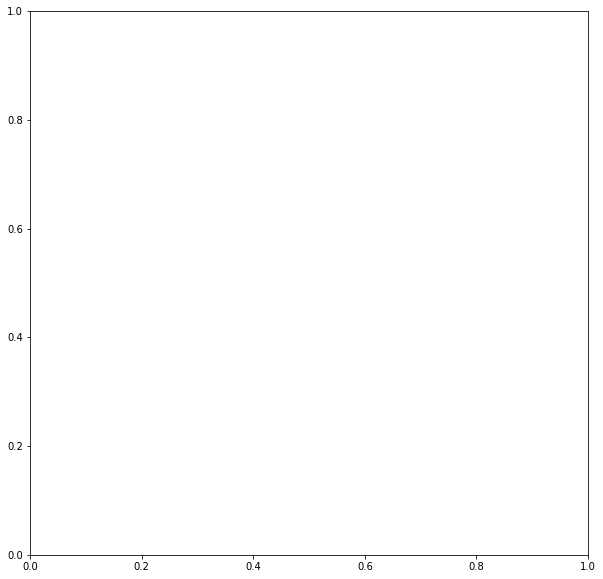

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
coefficients.sort_values().plot.barh();

In [0]:
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)

In [0]:
y_pred = model.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-01.csv', index=False)

In [0]:
dt = DecisionTreeClassifier(random_state=42, max_depth=15)
dt.fit(X_train_scaled, y_train)
print('Decision Tree')
print('Train Accuracy', dt.score(X_train_scaled, y_train))
print('Validation Accuracy', dt.score(X_val_scaled, y_val))


submission = sample_submission.copy()
submission['status_group'] = dt.predict(X_test_scaled)
submission.to_csv('submission02.csv', index=False)

Decision Tree
Train Accuracy 0.8328914141414141
Validation Accuracy 0.7633838383838384


In [0]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=(169,)),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [0]:
model = build_model()


In [0]:
X_train_scaled

array([[ 1.7059149 , -1.12602531, -0.33988107, ..., -0.1680417 ,
        -0.38828453, -1.36997234],
       [-0.58619571,  0.88807951, -0.33988107, ..., -0.1680417 ,
        -0.01037736,  0.74161044],
       [ 1.7059149 , -1.12602531, -0.33988107, ..., -0.47985541,
         4.57849537,  0.74371361],
       ...,
       [-0.58619571,  0.88807951, -0.33988107, ...,  2.84615754,
        -0.38612506,  0.74581678],
       [ 1.7059149 , -1.12602531, -0.33988107, ...,  2.84615754,
         0.30274572,  0.72057874],
       [-0.58619571,  0.88807951, -0.33988107, ...,  0.03983411,
        -0.19393227,  0.71426923]])

In [0]:
X_val

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
3290,67999,0.0,2011-07-09,Tasaf,0,DWE,31.509864,-1.153080,Kwawilliam,0,Lake Victoria,Nyakalembe,Kagera,18,7,Misenyi,Kassambya,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
47666,9256,2000.0,2013-02-05,Kidp,1576,KIDP,29.838600,-4.429692,Nyamakanka,0,Lake Tanganyika,Kishengezi B,Kigoma,16,2,Kasulu,Muhinda,1,True,GeoData Consultants Ltd,Water authority,NaN,False,1991,other,other,other,vwc,user-group,pay annually,annually,soft,good,insufficient,insufficient,spring,spring,groundwater,improved spring,improved spring
2538,3168,25.0,2013-03-28,Rc Church,898,RC CHURCH,37.748364,-4.061791,Kwa Mama Juma,0,Pangani,Majevu A,Kilimanjaro,3,3,Same,Same Urban,420,True,GeoData Consultants Ltd,Water authority,NaN,NaN,2011,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,salty,salty,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
53117,19684,0.0,2011-07-25,The Desk And Chair Foundat,0,The desk and chair foundat,33.380346,-3.132556,Lahu B,0,Lake Victoria,Lahu,Mwanza,19,4,Kwimba,Nyamilama,0,NaN,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
51817,42303,0.0,2011-08-03,Germany,548,Germany,37.648831,-6.725480,Chazo Cha Kilongo,0,Wami / Ruvu,Kiloka,Morogoro,5,5,Morogoro Urban,Kihonda,500,True,GeoData Consultants Ltd,VWC,NaN,True,1985,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,other,other
2109,47818,0.0,2012-11-11,District Council,0,District council,33.646675,-5.432095,Shuleni,0,Internal,Malongwe Senta,Tabora,14,3,Uyui,Kizengi,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
45952,531,0.0,2012-10-10,Rwssp,0,WEDECO,34.230980,-3.195915,Upendo B,0,Internal,Mwachomela,Shinyanga,17,6,Meatu,Mwandoya,0,True,GeoData Consultants Ltd,WUG,None,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
39884,26814,0.0,2013-02-10,Fini Water,-9,Fini water,40.188277,-10.383813,Kisambula,0,Ruvuma / Southern Coast,Mayomanilo,Mtwara,99,1,Mtwara Rural,Ziwani,400,True,GeoData Consultants Ltd,NaN,NaN,False,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
34261,31116,0.0,2011-04-09,Tanza,0,Commu,35.936992,-6.131838,Kwa Daudi,0,Wami / Ruvu,Magungu,Dodoma,1,5,Dodoma Urban,Mtumba,0,True,GeoData Consultants Ltd,VWC,Mtum,False,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
5966,73973,0.0,2011-07-25,Kkkt,0,DWE,30.907942,-1.401493,Kwachristian,0,Lake Victoria,Nyakagera,Kagera,18,1,Karagwe,Kimuli,0,True,GeoData Consultants Ltd,VWC,Nyakagera water,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe


In [0]:
y_val_encoded = y_val.replace(['non functional','functional needs repair','functional'],[0,1,2])
y_train_encoded = y_train.replace(['non functional','functional needs repair','functional'],[0,1,2])
y_val_encoded

3290     2
47666    2
2538     2
53117    0
51817    0
2109     1
45952    2
39884    2
34261    0
5966     0
21378    2
14334    2
8314     2
1416     2
43946    2
57730    2
27843    2
42521    0
2904     1
28888    0
43827    2
41727    0
37059    2
35565    0
8067     2
36459    2
4007     2
46935    2
55680    0
16374    0
        ..
13873    2
22893    0
44669    1
40670    2
50456    0
32831    0
5643     2
6766     2
23309    2
40814    0
58331    0
31457    0
22741    0
7244     1
15182    2
16024    0
12129    2
48162    2
19430    2
53755    0
768      2
31128    2
6462     2
28878    0
2509     2
9006     0
20942    0
29031    0
3493     0
257      0
Name: status_group, Length: 11880, dtype: int64

In [0]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  X_train_scaled, y_train_encoded,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])



....................................................................................................
...................................................................

In [0]:
y_pred = model.predict(X_val_scaled)

print(np.asarray(np.round(y_pred), dtype=int))

X_val['pred'] = np.asarray(np.round(y_pred), dtype=int)
X_val = X_val.replace({'pred': {0:'non functional',1:'functional needs repair',2:'functional'}})
X_val['y'] = y_val
print(X_val)



[[1]
 [2]
 [2]
 ...
 [2]
 [1]
 [0]]
          id  amount_tsh  ...                     pred                        y
3290   67999        0.00  ...  functional needs repair               functional
47666   9256     2000.00  ...               functional               functional
2538    3168       25.00  ...               functional               functional
53117  19684        0.00  ...  functional needs repair           non functional
51817  42303        0.00  ...           non functional           non functional
2109   47818        0.00  ...  functional needs repair  functional needs repair
45952    531        0.00  ...               functional               functional
39884  26814        0.00  ...               functional               functional
34261  31116        0.00  ...           non functional           non functional
5966   73973        0.00  ...           non functional           non functional
21378  73803     1000.00  ...               functional               functional
1433

In [0]:
y_pred = model.predict(X_test_scaled)

print(np.asarray(np.round(y_pred), dtype=int))

X_test['pred'] = np.asarray(np.round(y_pred), dtype=int)
X_test = X_test.replace({'pred': {0:'non functional',1:'functional needs repair',2:'functional'}})
print(X_test)
print(model.evaluate(X_val_scaled, y_val_encoded))
                            #batch_size=batch_size)
# print('Test score:', score)
# print('Test accuracy:', acc)

# submission = sample_submission.copy()
# submission['status_group'] = y_pred
# submission.to_csv('submission-01.csv', index=False)

[[1]
 [1]
 [2]
 ...
 [2]
 [2]
 [0]]
          id  amount_tsh  ...  waterpoint_type_group                     pred
0      50785        0.00  ...                  other  functional needs repair
1      51630        0.00  ...     communal standpipe  functional needs repair
2      17168        0.00  ...                  other               functional
3      45559        0.00  ...                  other           non functional
4      49871      500.00  ...     communal standpipe               functional
5      52449        0.00  ...     communal standpipe               functional
6      24806        0.00  ...              hand pump               functional
7      28965        0.00  ...     communal standpipe           non functional
8      36301       30.00  ...     communal standpipe           non functional
9      54122        0.00  ...     communal standpipe               functional
10       419        5.00  ...     communal standpipe               functional
11     45750        0.00  ..

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


11880/11880 [==============================] - 0s 34us/sample - loss: 0.5514 - mean_absolute_error: 0.5062 - mean_squared_error: 0.5514
[0.5514467635540047, 0.50618446, 0.5514466]


In [0]:
print(X_test)

          id  amount_tsh  ...              waterpoint_type  waterpoint_type_group
0      50785        0.00  ...                        other                  other
1      51630        0.00  ...           communal standpipe     communal standpipe
2      17168        0.00  ...                        other                  other
3      45559        0.00  ...                        other                  other
4      49871      500.00  ...           communal standpipe     communal standpipe
5      52449        0.00  ...           communal standpipe     communal standpipe
6      24806        0.00  ...                    hand pump              hand pump
7      28965        0.00  ...  communal standpipe multiple     communal standpipe
8      36301       30.00  ...           communal standpipe     communal standpipe
9      54122        0.00  ...           communal standpipe     communal standpipe
10       419        5.00  ...           communal standpipe     communal standpipe
11     45750    

In [0]:
y_val

3290                  functional
47666                 functional
2538                  functional
53117             non functional
51817             non functional
2109     functional needs repair
45952                 functional
39884                 functional
34261             non functional
5966              non functional
21378                 functional
14334                 functional
8314                  functional
1416                  functional
43946                 functional
57730                 functional
27843                 functional
42521             non functional
2904     functional needs repair
28888             non functional
43827                 functional
41727             non functional
37059                 functional
35565             non functional
8067                  functional
36459                 functional
4007                  functional
46935                 functional
55680             non functional
16374             non functional
          

In [32]:
len(features)

33

In [20]:
%%time
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
pd.set_option('display.float_format', '{:.2f}'.format)


X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1))

pipeline.fit(X_train, y_train)
print('Validation Accuracy',pipeline.score(X_val,y_val))
y_pred = pipeline.predict(X_test)

Validation Accuracy 0.8095959595959596
CPU times: user 5min 29s, sys: 3.64 s, total: 5min 32s
Wall time: 2min 51s


In [29]:
X_train.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity', 'source',
       'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'year_recorded', 'month_recorded',
       'day_recorded'],
      dtype='object')

In [30]:
X_test.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year', 'year_recorded', 'month_recorded', 'day_recorded',
       'basin', 'region', 'public_meeting', 'recorded_by', 'scheme_management',
       'permit', 'extraction_type', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [33]:
%%time

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=1000, random_state=55, n_jobs=-1))


pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8118686868686869
CPU times: user 2min 55s, sys: 2.23 s, total: 2min 57s
Wall time: 1min 31s


In [0]:
y_pred = pipeline.predict(X_test)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-04.csv', index=False)